### Data loading

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data_train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Class_2


In [4]:
data_test.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,0,5,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,7,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,4,0,2,0,0,2,0,3,6,3,0,0,6,0,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,4,4,0,0,0,0,0,3,0,0,0,0,0,2,11,0,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,4,1,0,0,1,0,0,1,1,1,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,0,0,1,0,0,9,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [5]:
# Droping id col
data_train = data_train.drop('id', axis=1)
data_test = data_test.drop('id', axis=1)

In [6]:
# Features descriptive analysis.
data_train.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='RdPu')\
                            .background_gradient(subset=['max'], cmap='BuPu')

,count,mean,std,min,25%,50%,75%,max
feature_0,100000.000000,0.257830,0.929033,0.000000,0.000000,0.000000,0.000000,10.000000
feature_1,100000.000000,0.431720,1.977862,0.000000,0.000000,0.000000,0.000000,31.000000
feature_2,100000.000000,0.114130,0.519584,0.000000,0.000000,0.000000,0.000000,6.000000
feature_3,100000.000000,0.590550,1.844558,0.000000,0.000000,0.000000,0.000000,26.000000
feature_4,100000.000000,0.599770,2.785531,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,100000.000000,0.160820,0.601149,0.000000,0.000000,0.000000,0.000000,10.000000
feature_6,100000.000000,0.731490,2.343465,0.000000,0.000000,0.000000,0.000000,27.000000
feature_7,100000.000000,1.228920,2.692732,0.000000,0.000000,0.000000,1.000000,31.000000
feature_8,100000.000000,0.903350,3.415258,0.000000,0.000000,0.000000,0.000000,39.000000
feature_9,100000.000000,0.940120,1.904172,0.000000,0.000000,0.000000,1.000000,17.000000


In [7]:
# Target distribution
target_counter = data_train.target.value_counts(sort=True, ascending=False)

fig = go.Figure([go.Bar(x=target_counter.index, y=target_counter.values, marker_color='crimson')])
fig.show()

In [8]:
# Target column clasess into numbers

label_dict = {val:idx for idx, val in enumerate(sorted(data_train['target'].unique()))}
data_train['target'] = data_train['target'].map(label_dict)

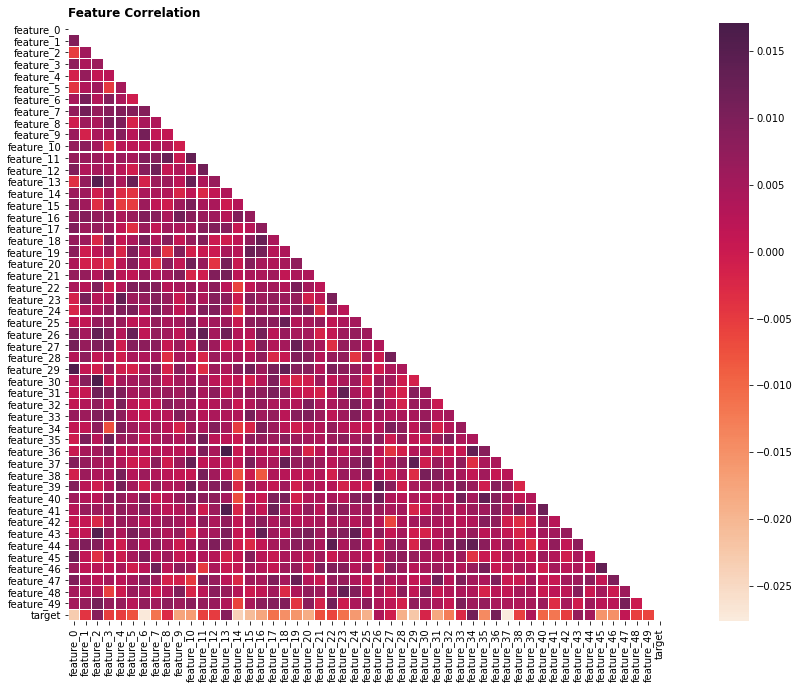

In [9]:
# Scatterplot matrix

fig, ax = plt.subplots(figsize=(19, 11))

corr = data_train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
        square = True, center=0, linewidth=0.2,
        cmap = sns.color_palette("rocket_r", as_cmap=True),
        mask = mask, ax = ax) 

ax.set_title('Feature Correlation', loc='left', fontweight='bold')
plt.show()

### Outliers

"x_data = data_train.iloc[:,:-1].columns\n\nN = len(data_train.iloc[:,:-1])\n\ny_data = [data_train[i].values for i in data_train.iloc[:,:-1].columns]\n\n'''colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',\n          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)'] '''\n\nfig = go.Figure()\n\nfor xd, yd in zip(x_data, y_data):\n        fig.add_trace(go.Box(\n            y=yd,\n            name=xd,\n            boxpoints='all',\n            jitter=0.5,\n            whiskerwidth=0.2,\n            fillcolor='rgba(127, 96, 0, 0.5)',\n            marker_size=2,\n            line_width=1)\n        )\n\nfig.update_layout(\n    title='Points Scored by the Top 9 Scoring NBA Players in 2012',\n    yaxis=dict(\n        autorange=True,\n        showgrid=True,\n        zeroline=True,\n        dtick=5,\n        gridcolor='rgb(255, 255, 255)',\n        gridwidth=1,\n        zerolinecolor='rgb(255, 255, 255)',\n        zerolinewid

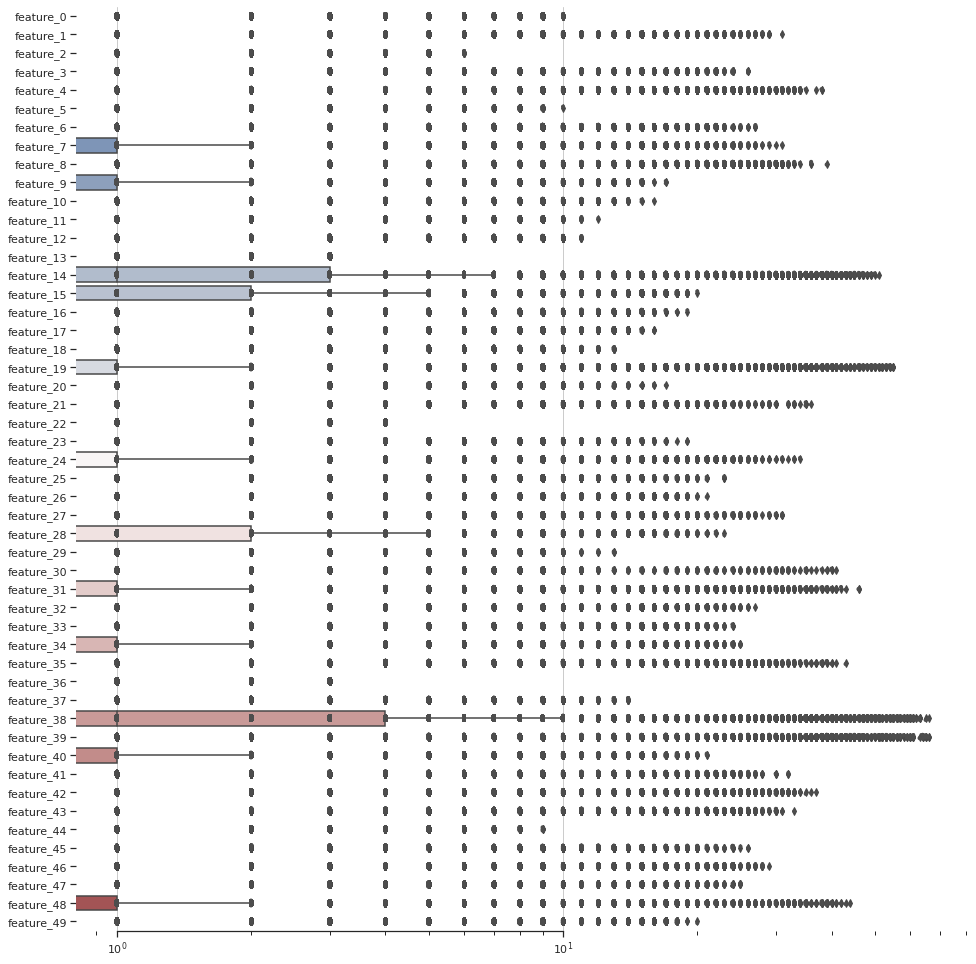

In [10]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(16, 17))
ax.set_xscale("log")

sns.boxplot(data=data_train.iloc[:,:-1], orient="h", palette="vlag")

sns.stripplot(data=data_train.iloc[:,:-1], orient="h",
              size=4, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [12]:
# outliers removal

data_train_wo = data_train.copy()

for i in data_train_wo.iloc[:,:-1].columns:
  data_train_wo = data_train_wo[(data_train_wo[i] >= data_train[i].quantile(.00)) & (data_train_wo[i] <= data_train[i].quantile(.998))]


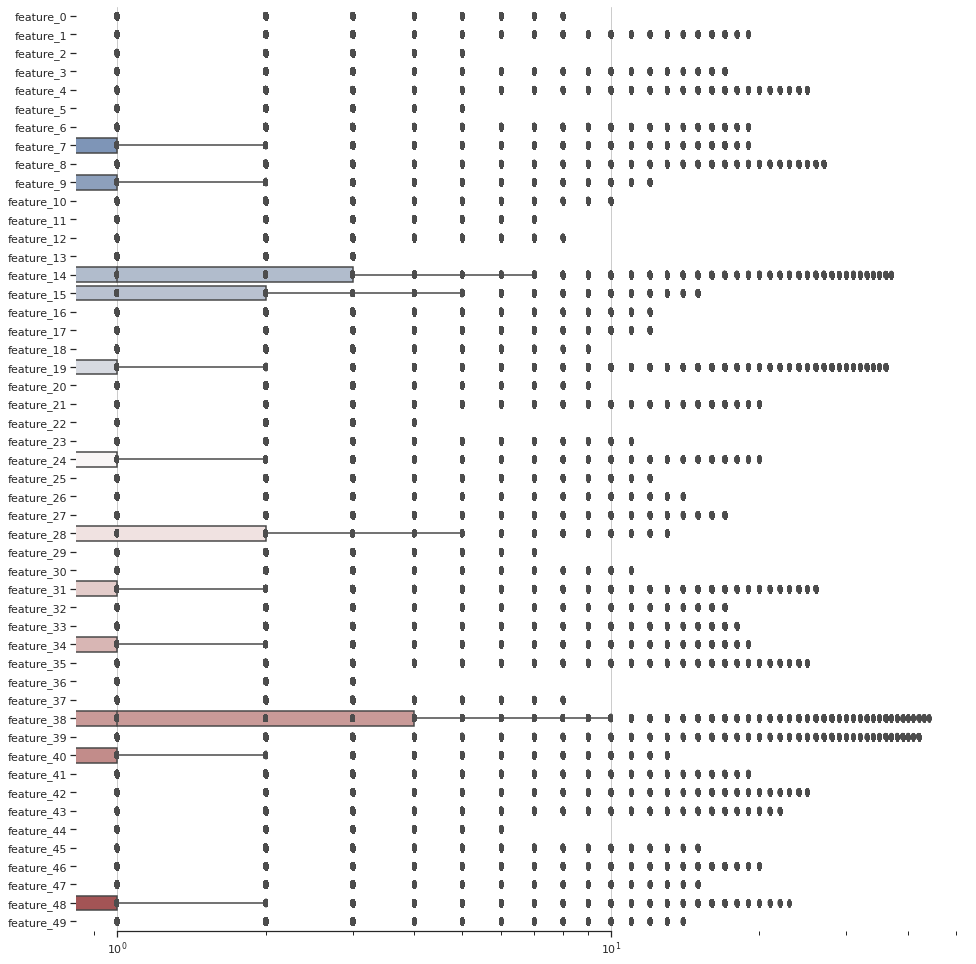

In [13]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(16, 17))
ax.set_xscale("log")

sns.boxplot(data=data_train_wo.iloc[:,:-1], orient="h", palette="vlag")

sns.stripplot(data=data_train_wo.iloc[:,:-1], orient="h",
              size=4, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

### Scaling data

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_train = data_train_wo.copy()
scaled_train.iloc[:,:-1] = sc.fit_transform(scaled_train.iloc[:,:-1])
scaled_test = pd.DataFrame(sc.transform(data_test), columns=list(data_test.columns))

In [15]:
scaled_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,-0.280432,-0.225974,1.732233,-0.337219,0.182081,-0.283655,-0.317513,-0.467684,-0.265884,-0.500375,-0.287821,-0.409140,-0.415907,-0.209014,-0.578281,-0.590073,-0.294221,2.998737,-0.443309,-0.337742,-0.275051,-0.317017,-0.332316,-0.33443,-0.42455,-0.33233,-0.244577,-0.199697,-0.608147,-0.240514,0.844052,-0.432197,-0.202774,-0.270063,-0.037029,-0.317973,-0.283541,-0.376712,-0.587351,-0.190075,1.441459,-0.306543,-0.241295,9.706114,-0.217968,-0.260709,-0.244786,-0.285542,-0.414486,-0.340332,1
1,-0.280432,-0.225974,-0.218652,-0.337219,0.581748,1.639636,-0.317513,-0.467684,-0.265884,-0.500375,-0.287821,-0.409140,-0.415907,-0.209014,-0.578281,0.866719,-0.294221,1.294550,-0.443309,-0.337742,-0.275051,-0.317017,-0.332316,-0.33443,-0.42455,-0.33233,-0.244577,-0.199697,-0.608147,-0.240514,-0.283468,-0.432197,1.488767,-0.270063,-0.459397,-0.317973,-0.283541,-0.376712,-0.587351,-0.190075,-0.427119,-0.306543,-0.241295,-0.270224,-0.217968,-0.260709,-0.244786,-0.285542,-0.414486,-0.340332,0
3,-0.280432,-0.225974,-0.218652,-0.337219,-0.217586,-0.283655,-0.317513,0.716349,-0.265884,-0.500375,-0.287821,-0.409140,-0.415907,2.603932,1.017304,4.751498,0.562070,-0.409637,2.474635,-0.110055,-0.275051,-0.317017,-0.332316,-0.33443,-0.42455,-0.33233,-0.244577,-0.199697,-0.045095,-0.240514,0.844052,-0.432197,-0.202774,-0.270063,-0.037029,-0.317973,-0.283541,-0.376712,0.224872,-0.190075,-0.427119,-0.306543,-0.241295,-0.270224,-0.217968,-0.260709,-0.244786,-0.285542,0.042354,-0.340332,3
4,-0.280432,-0.225974,-0.218652,-0.337219,-0.217586,-0.283655,-0.317513,-0.467684,-0.265884,-0.500375,-0.287821,-0.409140,-0.415907,-0.209014,-0.122399,-0.590073,7.412399,1.294550,-0.443309,-0.337742,-0.275051,-0.317017,-0.332316,-0.33443,-0.42455,-0.33233,-0.244577,-0.199697,-0.608147,-0.240514,-0.283468,-0.100873,-0.202774,-0.270063,-0.459397,-0.317973,-0.283541,-0.376712,-0.384296,-0.190075,-0.427119,-0.306543,-0.241295,-0.270224,-0.217968,-0.260709,-0.244786,-0.285542,0.042354,-0.340332,1
5,-0.280432,-0.225974,-0.218652,-0.337219,-0.217586,-0.283655,-0.317513,-0.467684,-0.265884,-0.500375,1.657440,0.644163,-0.415907,-0.209014,-0.578281,-0.590073,-0.294221,-0.409637,-0.443309,-0.337742,-0.275051,0.696989,-0.332316,-0.33443,-0.42455,-0.33233,-0.244577,-0.199697,-0.608147,-0.240514,-0.283468,-0.432197,-0.202774,-0.270063,-0.459397,-0.317973,-0.283541,-0.376712,-0.587351,-0.190075,-0.427119,-0.306543,-0.241295,-0.270224,-0.217968,-0.260709,-0.244786,-0.285542,-0.414486,0.302652,1


In [16]:
scaled_test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,-0.280432,-0.225974,-0.218652,-0.337219,-0.217586,-0.283655,1.505798,1.111026,-0.265884,-0.500375,4.575331,-0.409140,-0.415907,-0.209014,-0.578281,-0.104476,0.562070,-0.409637,0.529339,-0.337742,0.949870,-0.317017,-0.332316,-0.334430,-0.424550,-0.332330,3.549589,-0.199697,2.207115,-0.240514,-0.283468,-0.432197,-0.202774,-0.270063,-0.459397,-0.317973,-0.283541,-0.376712,0.224872,-0.190075,-0.427119,-0.306543,-0.241295,-0.270224,-0.217968,-0.260709,-0.244786,-0.285542,-0.414486,-0.340332
1,-0.280432,-0.225974,1.732233,-0.337219,-0.217586,-0.283655,0.594142,-0.467684,1.934314,3.324101,-0.287821,-0.409140,-0.415907,-0.209014,-0.578281,0.866719,-0.294221,-0.409637,1.501987,-0.337742,-0.275051,-0.317017,-0.332316,-0.334430,-0.424550,-0.332330,2.790756,-0.199697,0.517958,-0.240514,-0.283468,0.230452,-0.202774,1.132469,2.074811,0.802821,-0.283541,-0.376712,0.630984,-0.190075,1.441459,-0.306543,0.259216,-0.270224,-0.217968,-0.260709,0.277916,-0.285542,0.499193,0.302652
2,-0.280432,-0.225974,-0.218652,-0.337219,-0.217586,-0.283655,-0.317513,-0.467684,0.048430,-0.500375,-0.287821,-0.409140,-0.415907,-0.209014,-0.578281,-0.590073,-0.294221,-0.409637,-0.443309,4.215995,-0.275051,-0.317017,-0.332316,-0.334430,1.288321,3.173158,-0.244577,-0.199697,-0.608147,-0.240514,-0.283468,0.561777,-0.202774,-0.270063,-0.459397,-0.317973,-0.283541,1.619273,1.646263,-0.190075,-0.427119,-0.306543,-0.241295,0.204840,-0.217968,-0.260709,-0.244786,-0.285542,2.326551,-0.340332
3,-0.280432,-0.225974,-0.218652,-0.337219,-0.217586,-0.283655,-0.317513,-0.073006,0.048430,-0.500375,-0.287821,-0.409140,-0.415907,-0.209014,-0.578281,-0.104476,-0.294221,-0.409637,-0.443309,0.573005,0.949870,-0.317017,-0.332316,0.578515,-0.424550,-0.332330,0.514256,0.555379,-0.045095,-0.240514,-0.283468,-0.432197,0.642997,1.599979,-0.459397,-0.317973,-0.283541,-0.376712,-0.587351,-0.190075,-0.427119,-0.306543,-0.241295,-0.270224,-0.217968,-0.260709,2.891423,7.037243,5.981266,1.588621
4,-0.280432,-0.225974,-0.218652,-0.337219,-0.217586,-0.283655,0.138314,-0.467684,0.991372,-0.500375,-0.287821,0.644163,-0.415907,-0.209014,1.473185,-0.590073,-0.294221,-0.409637,-0.443309,-0.337742,-0.275051,1.203992,-0.332316,-0.334430,-0.424550,-0.332330,-0.244577,-0.199697,0.517958,-0.240514,-0.283468,-0.100873,0.642997,-0.270063,-0.037029,-0.317973,-0.283541,-0.376712,-0.587351,-0.190075,0.195740,-0.306543,-0.241295,-0.270224,-0.217968,-0.260709,-0.244786,-0.285542,-0.414486,-0.340332


### H2O

#### Requirements

In [17]:
# installing java
! apt-get install default-jre
! java -version
# install h2o
! pip install h2o

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
     |████████████████████████████████| 164.8MB 90kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.2-py2.py3-none-any.whl size=164848811 sha256=fdc456ba6f3b4e754205a0545ec252f3d067ea749447dafdf55e16e5423c1084
  Stored in directory: /root/.cache/pip/wheels/37/b6/c7/c1cfdcd471d476b2b5129f4d27a0fd89043858ee74eda7ee7a
Successfully built h2o


In [18]:
# Libraries
import h2o
from h2o.automl import *
%matplotlib inline

#### Model

### Grid searching and predictions

In [19]:
# Initialize H2O instance
import os

startup  = '/home/h2o/bin/aquarium_startup'
shutdown = '/home/h2o/bin/aquarium_stop'

if os.path.exists(startup):
    os.system(startup)
    local_url = 'http://localhost:54321/h2o'
    aquarium = True
else:
    local_url = 'http://localhost:54321'
    aquarium = False

In [20]:
h2o.init(url = local_url)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpws5vjjw9
  JVM stdout: /tmp/tmpws5vjjw9/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpws5vjjw9/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_1nnfab
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.174 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [21]:
h2o_train = h2o.H2OFrame(scaled_train.copy())
#h2o_test = h2o.H2OFrame(test_2d_df.copy())

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [22]:
h2o_train["target"] = h2o_train["target"].asfactor()

In [23]:
# Setting the limits to 25 models that will take 15 minutes
aml = H2OAutoML(max_runtime_secs = 60*30, 
                max_models = 30,  
                seed = 42 
                )

%time aml.train(x = list(scaled_train.iloc[:,:-1].columns), y = "target", training_frame = h2o_train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 3min 41s, sys: 5.45 s, total: 3min 47s
Wall time: 32min 48s


In [24]:
# Leaderboard
lb = aml.leaderboard
lb.head(rows = lb.nrows)

model_id,mean_per_class_error,logloss,rmse,mse,auc,aucpr
XGBoost_grid__1_AutoML_20210516_174531_model_1,0.737974,1.11293,0.627468,0.393716,nan,nan
XGBoost_grid__1_AutoML_20210516_174531_model_2,0.73971,1.12487,0.635016,0.403245,nan,nan
StackedEnsemble_AllModels_AutoML_20210516_174531,0.742245,1.09677,0.626534,0.392545,nan,nan
GBM_grid__1_AutoML_20210516_174531_model_1,0.742517,1.1197,0.641964,0.412118,nan,nan
GBM_grid__1_AutoML_20210516_174531_model_3,0.742677,1.3271,0.733973,0.538717,nan,nan
XRT_1_AutoML_20210516_174531,0.743408,1.22548,0.635048,0.403286,nan,nan
DRF_1_AutoML_20210516_174531,0.743881,1.2157,0.635512,0.403876,nan,nan
StackedEnsemble_BestOfFamily_AutoML_20210516_174531,0.743948,1.09878,0.627398,0.393628,nan,nan
DeepLearning_grid__1_AutoML_20210516_174531_model_2,0.743976,1.22839,0.625781,0.391602,nan,nan
XGBoost_2_AutoML_20210516_174531,0.744351,1.16664,0.673717,0.453894,nan,nan


In [25]:
# Predicting values

predintions = aml.predict(h2o.H2OFrame(scaled_test))
predintions_df = h2o.as_list(predintions)

Parse progress: |█████████████████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%


In [26]:
predintions_df.head()

,predict,p0,p1,p2,p3
0,1,0.081256,0.498228,0.327130,0.093385
1,1,0.047264,0.714974,0.171602,0.066161
2,1,0.066395,0.556658,0.194935,0.182013
3,1,0.073380,0.537085,0.272691,0.116844
4,1,0.061737,0.610464,0.222952,0.104848


In [27]:
# Submission to CSV

submission = predintions_df[['p0', 'p1', 'p2', 'p3']]
submission.rename(columns={"p0": "Class_1", "p1": "Class_2", "p2": "Class_3", "p3": "Class_4"}, inplace=True)
submission.insert(0, 'id', range(100000, 100000 + len(submission)))
submission.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.081256,0.498228,0.327130,0.093385
1,100001,0.047264,0.714974,0.171602,0.066161
2,100002,0.066395,0.556658,0.194935,0.182013
3,100003,0.073380,0.537085,0.272691,0.116844
4,100004,0.061737,0.610464,0.222952,0.104848


In [28]:
submission.to_csv('h2o_automl_1200s_scaled_wo_2.csv', index=False)
submission.head()

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.081256,0.498228,0.327130,0.093385
1,100001,0.047264,0.714974,0.171602,0.066161
2,100002,0.066395,0.556658,0.194935,0.182013
3,100003,0.073380,0.537085,0.272691,0.116844
4,100004,0.061737,0.610464,0.222952,0.104848


PyCaret